In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

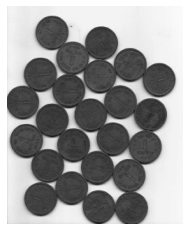

In [3]:
image = cv2.imread("images/coins.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

display(gray)

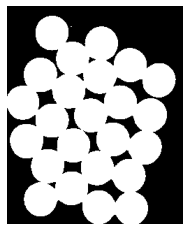

In [4]:
# binary image

_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

display(thresh)

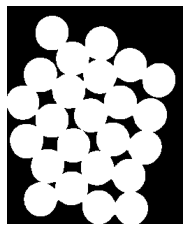

In [5]:
# remove noise

kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

display(opening)

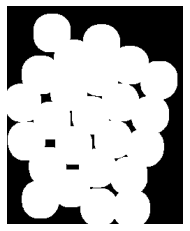

In [6]:
sure_bg = cv2.dilate(opening,kernel, iterations=3)

display(sure_bg)

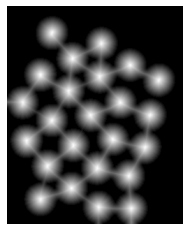

In [7]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

display(dist_transform)

In [8]:
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

sure_fg

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
sure_bg.dtype

dtype('uint8')

In [10]:
sure_fg = sure_fg.astype('uint8')
sure_fg.dtype

dtype('uint8')

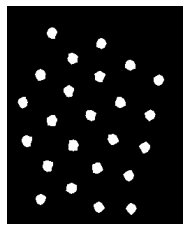

In [11]:
display(sure_fg)

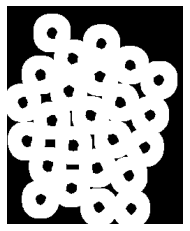

In [12]:
unknown = cv2.subtract(sure_bg, sure_fg)

display(unknown)

In [13]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

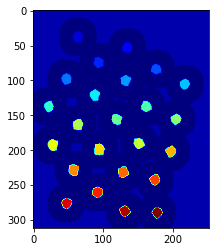

In [14]:
plt.imshow(markers, cmap='jet')
plt.show()

In [15]:
# apply the watershed algorithm
markers = cv2.watershed(image,markers)

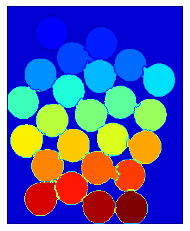

In [16]:
plt.imshow(markers, cmap='jet')
plt.axis('off')
plt.show()